<a href="https://colab.research.google.com/github/WambuiKuria2/Dimension-reduction-with-R/blob/master/Cleaning_Train_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello, Patrick Atak!")

Hello, Patrick Atak!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [ ]:
print(f"The numpy version: {np.__version__}")
print(f"The pandas version: {pd.__version__}")

The numpy version: 1.16.5
The pandas version: 0.25.1


## Reading in the dataset

In [ ]:
df = pd.read_csv("Train.csv")
df.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


## Exploring

In [ ]:
# Get te size of the dataset 
print(f"The size of the data set is: {df.size}")

The size of the data set is: 500542


In [ ]:
# Get the shape of the dataset
print(f"The shape of the data set is: {df.shape}")
print("The data has 35753 observations and 14 features.")

The shape of the data set is: (35753, 14)
The data has 35753 observations and 14 features.


In [ ]:
# Get the dimensions of the dataset
df.ndim

2

In [ ]:
# Get the column names
list(df.columns)

['year',
 'month',
 'region',
 'district',
 'site_code',
 'product_code',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_stockout_days',
 'stock_ordered']

In [ ]:
# Get the column data types
df.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_stockout_days              int64
stock_ordered                  float64
dtype: object

In [ ]:
# Get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
year                           35753 non-null int64
month                          35753 non-null int64
region                         35753 non-null object
district                       35753 non-null object
site_code                      35753 non-null object
product_code                   35753 non-null object
stock_initial                  35753 non-null int64
stock_received                 35753 non-null int64
stock_distributed              35753 non-null int64
stock_adjustment               35753 non-null int64
stock_end                      35753 non-null int64
average_monthly_consumption    35753 non-null int64
stock_stockout_days            35753 non-null int64
stock_ordered                  34990 non-null float64
dtypes: float64(1), int64(9), object(4)
memory usage: 3.8+ MB


**--------------------------------------------------------------------**

From the info we can deduce that:

    a) There are 35753 observations in most of the columns.
    b) The column "stock_ordered" looks like it's missing some values.
    c) int64 and object are the dominant data types. 

## Cleaning

In [ ]:
# Checking for missing values
df.isnull().values.sum()

763

- There is a total of **763** missing values present within the dataset.

In [ ]:
# Checking for missing values
df.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

The breakdown above confirms the previous suspicion about the **"stock_ordered"** column having missing values.

In [ ]:
# Filling in the missing values
#
# Since the values in this columns are of float64 data type
# I have decided to fill the missing values with the mean
# of the whole column.
df['stock_ordered'].fillna(df['stock_ordered'].mean(), inplace=True)

In [ ]:
df['stock_ordered'].mean()

26.65810231494667

In [ ]:
df['stock_ordered'].nunique()

334

In [ ]:
# Checking once more to see if we have done away with our missing values.
df.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Region" column.
print(f"The number of unique observations in the region column is: {df['region'].nunique()}")

The number of unique observations in the region column is: 20


- The presence of only 20 unique observations in the region column, allows me to potentially encode this column.

In [ ]:
df['region'].value_counts()

ABIDJAN 2                  6504
ABIDJAN 1-GRANDS PONTS     4597
AGNEBY-TIASSA-ME           2389
PORO-TCHOLOGO-BAGOUE       2319
GBOKLE-NAWA-SAN PEDRO      2266
N'ZI-IFOU-MORONOU          2132
BELIER                     1625
BOUNKANI-GONTOUGO          1593
SUD-COMOE                  1491
HAUT-SASSANDRA             1295
MARAHOUE                   1154
GOH                        1134
LOH-DJIBOUA                1096
CAVALLY-GUEMON             1089
KABADOUGOU-BAFING-FOLON    1039
HAMBOL                     1018
TONKPI                      884
WORODOUGOU-BERE             792
GBEKE                       757
INDENIE-DJUABLIN            579
Name: region, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "District" column.
print(f"The number of unique observations in the district column is: {df['district'].nunique()}")

The number of unique observations in the district column is: 80


In [ ]:
df['district'].value_counts()

KOUMASSI-PORT BOUET-VRIDI    2315
COCODY-BINGERVILLE           2016
ADJAME-PLATEAU-ATTECOUBE     1616
YOPOUGON-OUEST-SONGON        1366
ABOBO-EST                    1298
                             ... 
MAN                           135
AGNIBILEKROU                  121
MINIGNAN                      121
NASSIAN                       114
BANGOLO                        90
Name: district, Length: 80, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Site Code" column.
print(f"The number of unique observations in the site code column is: {df['site_code'].nunique()}")

The number of unique observations in the site code column is: 155


In [ ]:
df['site_code'].value_counts()

C1015    416
C1087    413
C1030    405
C1055    404
C1112    398
        ... 
C3043     47
C2194     44
C1745     43
C1094     30
C1701     16
Name: site_code, Length: 155, dtype: int64

In [ ]:
# Looking for a number of distinct observations within the "Product Code" column.
print(f"The number of unique observations in the product code column is: {df['product_code'].nunique()}")

The number of unique observations in the product code column is: 11


In [ ]:
df['product_code'].value_counts()

AS27133    5368
AS27000    5259
AS27134    4708
AS27137    4449
AS27132    4436
AS27138    4060
AS27139    2347
AS46000    1981
AS42018    1550
AS17005    1248
AS21126     347
Name: product_code, dtype: int64

From the data after getting the number of unique observations within each column that had **"object"** as it's data type. I came to this conclusion:
    
    a) The region column has a total of 20 unique observations, meaning that I can potentially encode this column.
    b) The product code seemed to has the smallest number of unique observations, thus allowing it to be encoded easily.
    c) The site code and district columns had too many unique observations so I think I'll drop them.

In [ ]:
# Checking for statistical information
df.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.0,35753.000000
mean,2017.433782,6.169412,63.245518,14.846055,14.764327,0.961150,64.288395,14.606439,0.0,26.658102
std,1.019933,3.429079,168.661538,70.631782,39.848242,37.883099,170.848479,32.521384,0.0,106.016374
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,20.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


In [ ]:
# Check for outliers in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
# Finding the Upper Bound and the Lower Bound
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

print("Lower bound values")
print("\n")
print(lower_bound)

print("\n")
print("===============")
print("===============")
print("\n")

print("Upper bound values")
print("\n")
print(upper_bound)

Lower bound values


year                           2015.5
month                            -6.0
stock_initial                  -103.5
stock_received                    0.0
stock_distributed               -19.5
stock_adjustment                  0.0
stock_end                      -105.0
average_monthly_consumption     -24.0
stock_stockout_days               0.0
stock_ordered                   -30.0
dtype: float64




Upper bound values


year                           2019.5
month                            18.0
stock_initial                   172.5
stock_received                    0.0
stock_distributed                32.5
stock_adjustment                  0.0
stock_end                       175.0
average_monthly_consumption      40.0
stock_stockout_days               0.0
stock_ordered                    50.0
dtype: float64


In [ ]:
# Presenting the outliers
df[((df <  lower_bound) |(df > upper_bound)).any(axis=1)]

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
5,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27133,50,50,19,0,81,6,0,0.0
7,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4023,AS27133,150,0,29,0,121,51,0,0.0
8,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35743,2016,10,LOH-DJIBOUA,GUITRY,C2055,AS27134,0,100,9,0,91,3,0,0.0
35746,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27139,0,0,0,0,0,0,0,100.0
35747,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27000,18,10,15,0,13,16,0,10.0
35748,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27133,0,50,25,0,25,8,0,25.0


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
print(df.shape)

(21519, 14)
(35753, 14)


In [ ]:
#pip install datacleaner
#from datacleaner import autoclean

In [ ]:
#my_data = pd.read_csv('Train.csv', sep=',')
#my_clean_data = autoclean(my_data)
#my_data.to_csv('my_clean_data.csv', sep=',', index=False)

In [ ]:
mcc = pd.read_csv('my_clean_data.csv')
mcc.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,11,0,119,5,75,0,21,-54,0,18,0,100.0
1,2019,1,11,0,119,3,3,0,3,0,0,2,0,10.0
2,2019,1,11,0,119,2,0,75,22,0,53,9,0,0.0
3,2019,1,11,0,119,6,2,0,0,0,2,0,0,0.0
4,2019,1,11,0,119,7,45,0,2,0,43,1,0,0.0


In [ ]:
mcc.tail()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
35748,2016,7,13,40,83,4,0,50,25,0,25,8,0,25.0
35749,2016,7,13,40,83,7,150,0,0,0,150,0,0,0.0
35750,2016,7,13,40,83,3,1,10,4,0,7,13,0,0.0
35751,2016,7,13,40,83,5,8,0,8,0,0,10,0,0.0
35752,2016,7,13,40,83,0,48,0,2,0,46,1,0,0.0


In [ ]:
# Check for outliers in the dataset
Q1 = mcc.quantile(0.25)
Q3 = mcc.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
mcc_new = mcc[~((mcc < (Q1 - 1.5 * IQR)) |(mcc > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mcc_new.shape)
print(mcc.shape)

(21519, 14)
(35753, 14)


In [ ]:
list(mcc.columns)


['year',
 'month',
 'region',
 'district',
 'site_code',
 'product_code',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_stockout_days',
 'stock_ordered']

## EDA

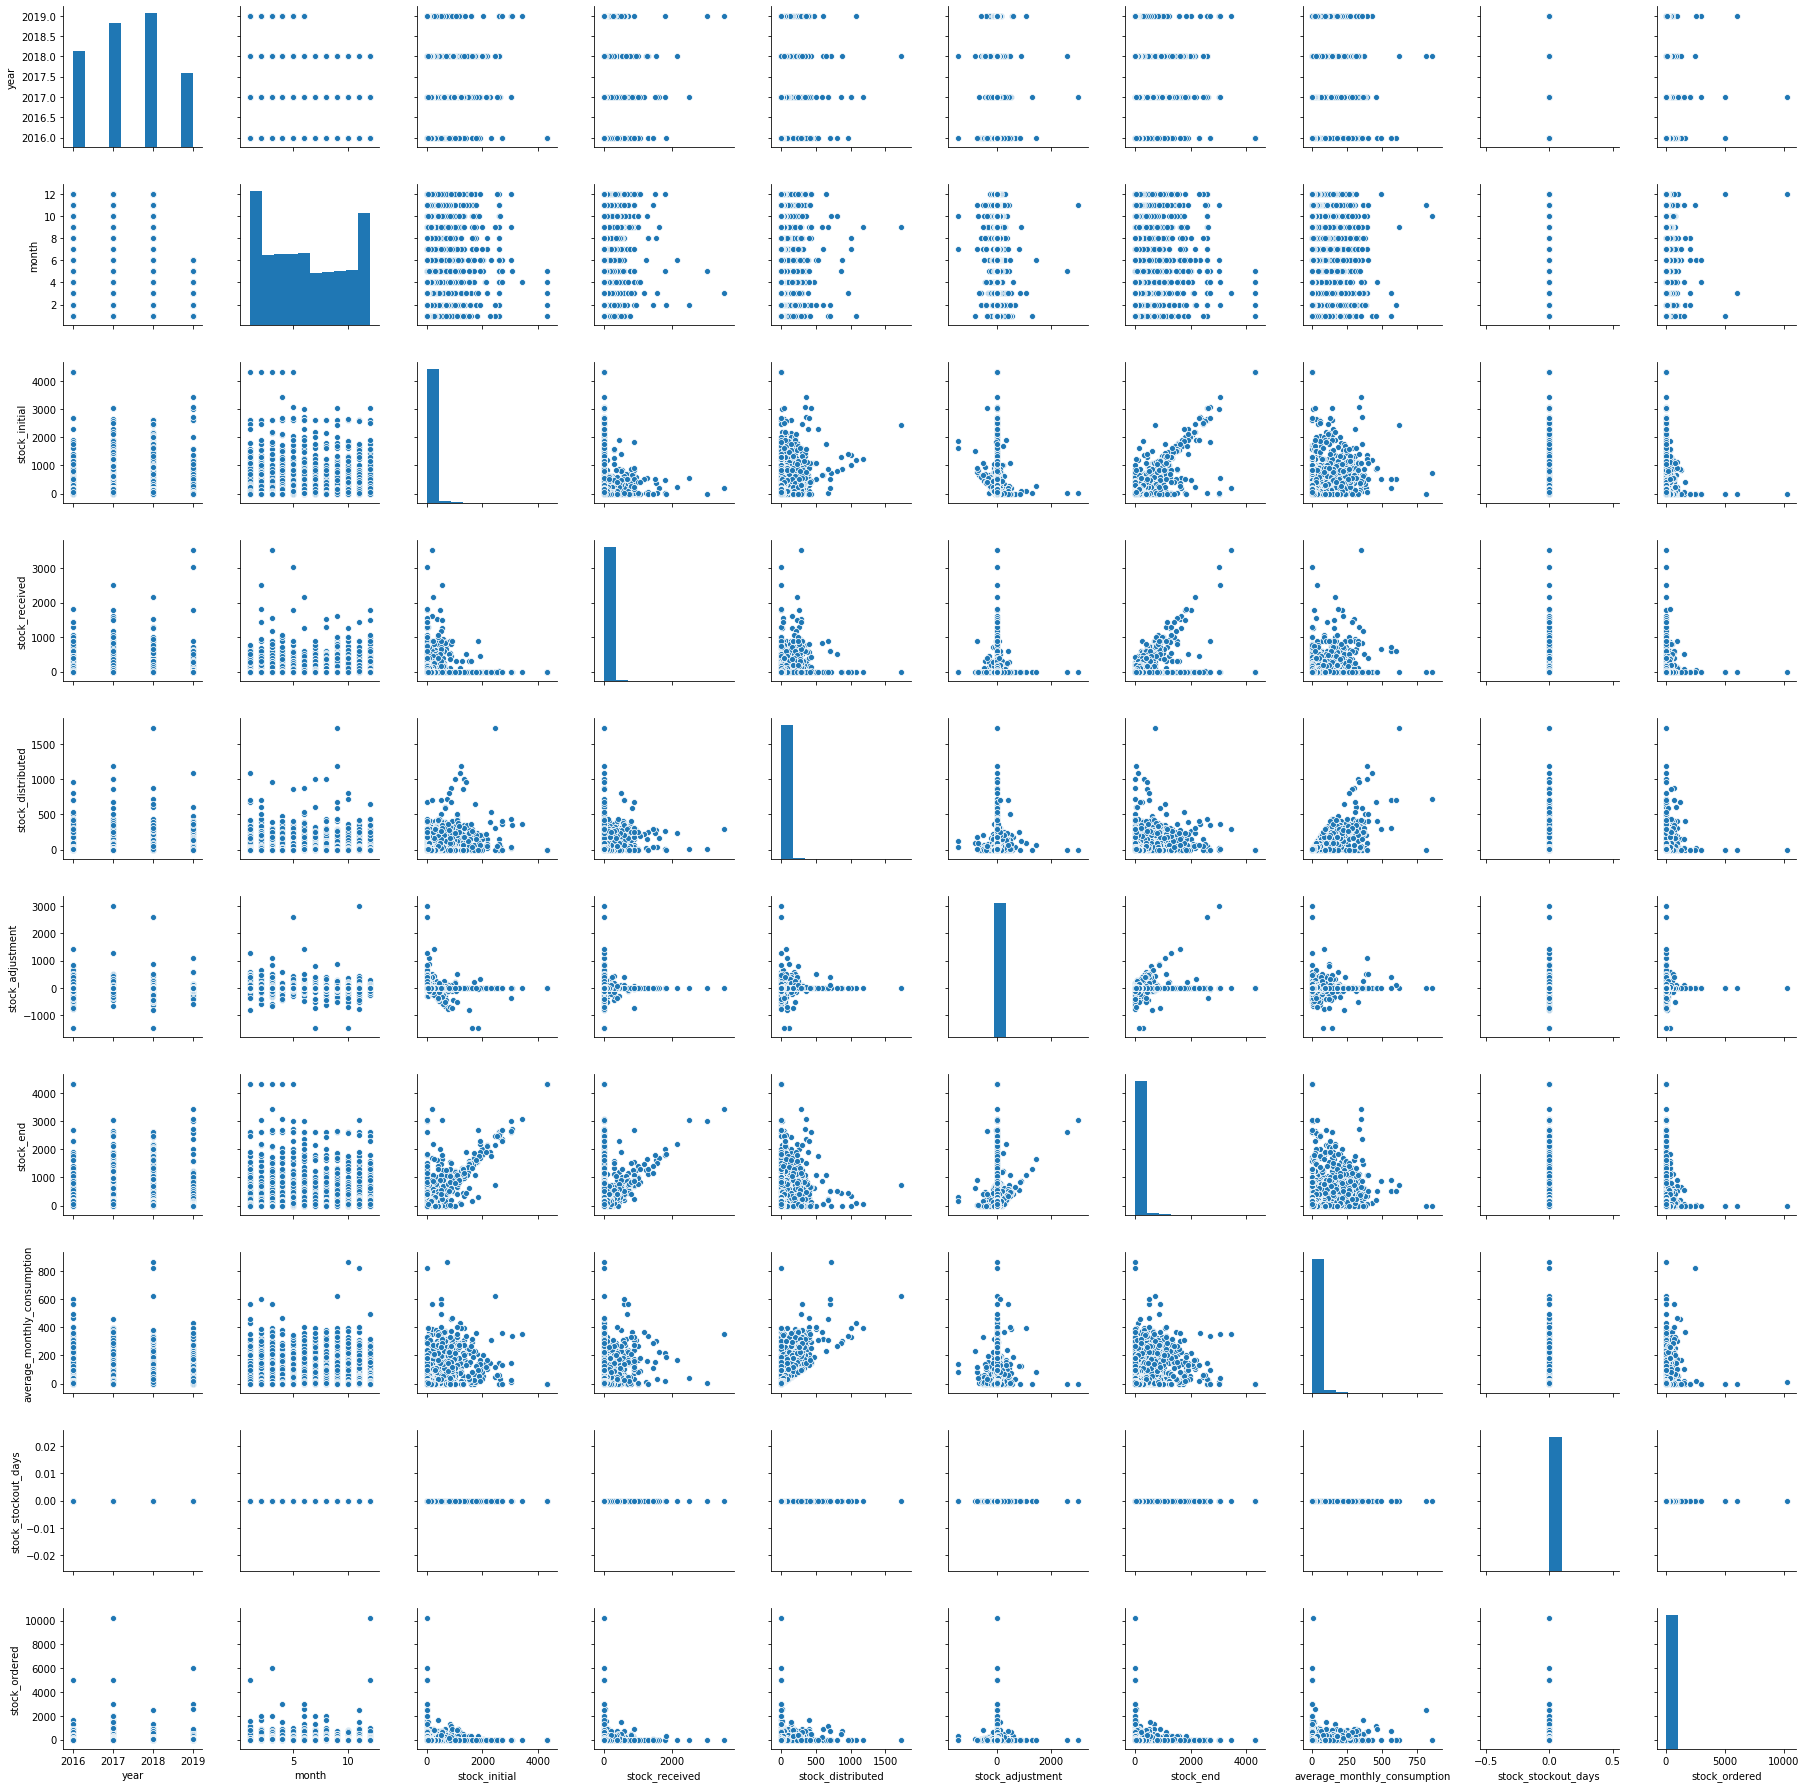

In [ ]:
sns.pairplot(df)

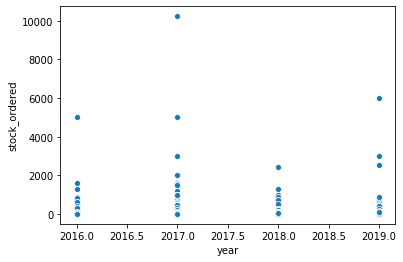

In [ ]:
# A relationship between the 4 years and the amount of stock ordered
sns.scatterplot(x = df['year'], y = df['stock_ordered'])

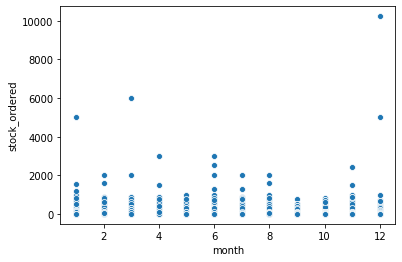

In [ ]:
# A relationship between the month and the amount of stock ordered
sns.scatterplot(x = df['month'], y = df['stock_ordered'])

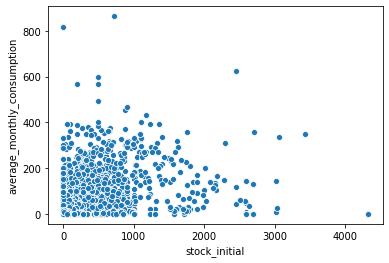

In [ ]:
# Stock Initial vs Average Monthly Consumption
sns.scatterplot(x = df['stock_initial'], y = df['average_monthly_consumption']);

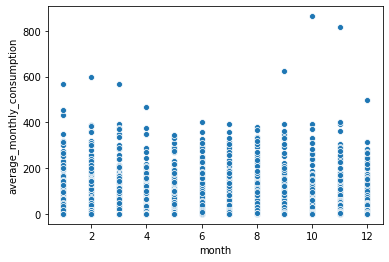

In [ ]:
# Month vs Average Monthly Consuption
sns.scatterplot(x = df['month'], y = df['average_monthly_consumption']);

## Modelling Our Data

In [ ]:
# Splitting the data into X matrix of features and y vector variable
# X matrix of features
# y vector of variables
X = mcc.drop(['year', 'month','stock_distributed'], axis = 1)
y = mcc['stock_distributed']


In [ ]:
X

,region,district,site_code,product_code,stock_initial,stock_received,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,11,0,119,5,75,0,-54,0,18,0,100.0
1,11,0,119,3,3,0,0,0,2,0,10.0
2,11,0,119,2,0,75,0,53,9,0,0.0
3,11,0,119,6,2,0,0,2,0,0,0.0
4,11,0,119,7,45,0,0,43,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35748,13,40,83,4,0,50,0,25,8,0,25.0
35749,13,40,83,7,150,0,0,150,0,0,0.0
35750,13,40,83,3,1,10,0,7,13,0,0.0
35751,13,40,83,5,8,0,0,0,10,0,0.0


In [ ]:
y

0        21
1         3
2        22
3         0
4         2
         ..
35748    25
35749     0
35750     4
35751     8
35752     2
Name: stock_distributed, Length: 35753, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling on the features
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.62021843 -1.67148333  0.98625051 ...  0.10435008  0.
   0.69671391]
 [ 0.62021843 -1.67148333  0.98625051 ... -0.38764079  0.
  -0.15166343]
 [ 0.62021843 -1.67148333  0.98625051 ... -0.17239479  0.
  -0.24592758]
 ...
 [ 0.93907426 -0.0099671   0.17446033 ... -0.04939707  0.
  -0.24592758]
 [ 0.93907426 -0.0099671   0.17446033 ... -0.14164536  0.
  -0.24592758]
 [ 0.93907426 -0.0099671   0.17446033 ... -0.41839022  0.
  -0.24592758]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

Now that I've got my data split into train and test sets. It's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

    1. Multiple Linear Regressor
    2. Support Vector Regressor
    3. Decision Tree Regressor
    4. Random Forest Regressor

In [ ]:
# Import the ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "SVR": SVR(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Linear Regression': 1.0,
 'SVR': 0.4644163044011904,
 'Decision Tree': 0.6908289774620253,
 'Random Forest': 0.8344826994295431}

## Model Comparison

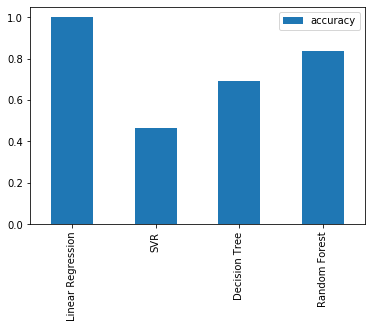

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

    * Hypyterparameter tuning
    * Feature importance
    * MSE
    * RMSE
    * Cross Validation